# Insolation Plots

### Things still to correct:
- Relabel bottom axis (with months only)
- Overplot 1850 insolation as contours
- cross hatch out the polar night
- select ticks to label in the colorbar
- ADD PANEL ABOUT ARCTIC?

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cftime
import nc_time_axis
import numpy as np

In [2]:
pi_file = xr.open_dataset("rsdt_piControl_AWI_daily.nc", decode_times=False)
lig_file = xr.open_dataset("rsdt_lig127k_AWI_daily.nc", decode_times=False)
lig_file

<xarray.Dataset> Size: 27MB
Dimensions:    (lat: 96, bnds: 2, lon: 192, time: 365)
Coordinates:
  * lat        (lat) float64 768B -88.57 -86.72 -84.86 ... 84.86 86.72 88.57
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time       (time) float64 3kB 6.012e+05 6.012e+05 ... 6.016e+05 6.016e+05
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    rsdt       (time, lat, lon) float32 27MB ...
    time_bnds  (time, bnds) float64 6kB ...
Attributes: (12/38)
    Conventions:           CF-1.7 CMIP-6.2
    activity_id:           PMIP
    creation_date:         2020-03-15T16:40:17Z
    data_specs_version:    01.00.30
    experiment:            last interglacial (127k)
    experiment_id:         lig127k
    ...                    ...
    variable_id:           rsdt
    variant_label:         r1i1p1f1
    license:               CMIP6 model data produced by Alfred Wegener Instit...
    cmor_version:          3.5.0
    tracking_id:           hdl:21.14100/4aad618e-5dbd-482d-a23c-a6e15f59b48a
    NCO:                   netCDF Operators version 5.1.4 (Homepage = http://...

<xarray.DataArray 'rsdt' (time: 365, lat: 96)> Size: 140kB
[35040 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 768B -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
    lon      float64 8B 0.0
  * time     (time) object 3kB 1850-01-01 00:00:00 ... 1850-12-31 00:00:00
Attributes:
    standard_name:  toa_incoming_shortwave_flux
    long_name:      TOA Incident Shortwave Radiation
    comment:        Shortwave radiation incident at the top of the atmosphere
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-03-15T16:40:17Z altered by CMOR: replaced missing va...

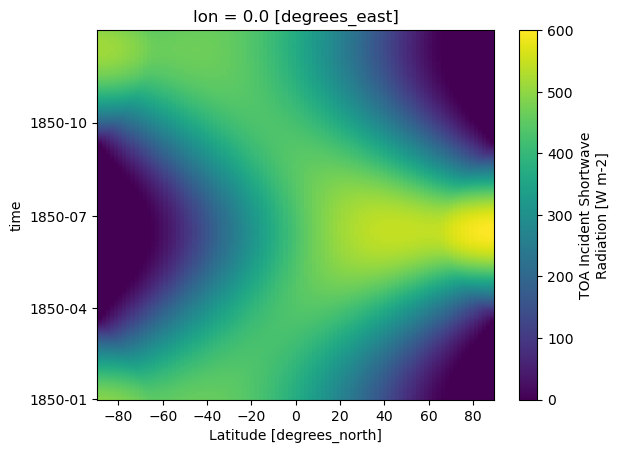

In [3]:

pi_rsdt=pi_file.rsdt[:,:,0].copy()
lig_rsdt=lig_file.rsdt[:,:,0].copy()
pi_rsdt['time'] = xr.cftime_range(start='1850-01-01', periods=pi_file.sizes['time'])
lig_rsdt['time'] = xr.cftime_range(start='1850-01-01', periods=lig_file.sizes['time'])
lig_rsdt.plot() 
lig_rsdt

<xarray.DataArray 'time' (time: 365)> Size: 3kB
array([cftime.DatetimeGregorian(1850, 1, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 1, 2, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 1, 3, 0, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(1850, 12, 29, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 12, 30, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 12, 31, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
    lon      float64 8B 0.0
  * time     (time) object 3kB 1850-01-01 00:00:00 ... 1850-12-31 00:00:00

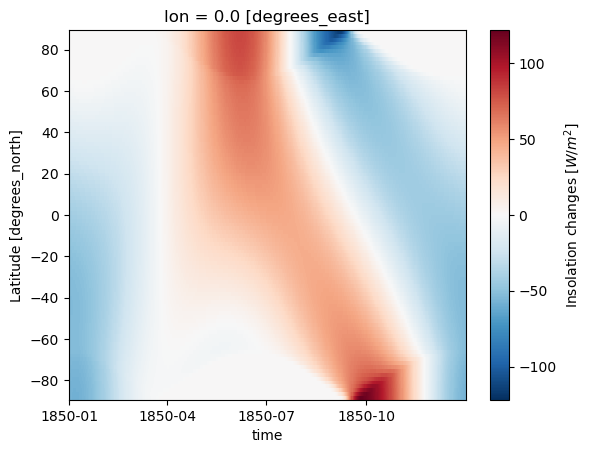

In [4]:
diff_rsdt=lig_rsdt.transpose()-pi_rsdt.transpose()
diff_rsdt.attrs['units'] = r'$W/m^2$'
diff_rsdt.attrs['long_name'] = 'Insolation changes'
diff_rsdt.plot()
diff_rsdt.time

/home/ucfaccb/miniconda3/envs/jaspy3.11/lib/python3.11/site-packages/xarray/plot/dataarray_plot.py:2134: UserWarning: The following kwargs were not used by contour: 'label'
  primitive = ax.contourf(x, y, z, **kwargs)


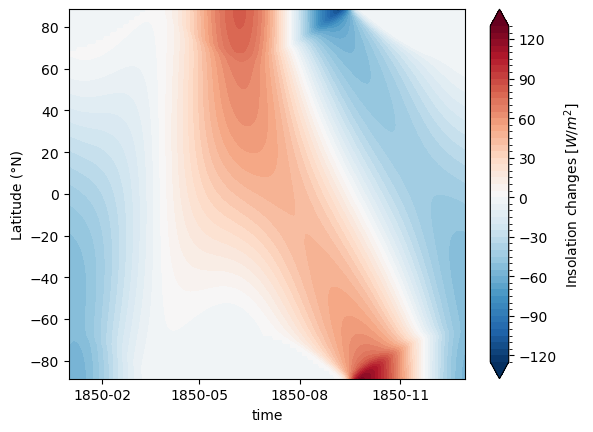

In [5]:
# Create a plot of the difference in rsdt between the LIG and piControl simulations
ax = diff_rsdt.plot.contourf(levels=range(-125,135,5), cmap='RdBu_r', extend='both',label='Insolation changes (W/m^2)')
#ax=ax.contour(pi_rsdt.transpose(), colors='black')
ax.axes.set_title('')
ax.axes.set_ylabel('Latitude (°N)')
ax.axes.set_label("Insolation changes (W/m^2)")
#formatter = nc_time_axis.CFTimeFormatter("%m", "noleap")
#ax.axes.xaxis.set_major_formatter(formatter)
plt.show()

In [6]:
def compute_latitude_band_areas(lat_bnds):
    # Earth's radius in meters
    R = 6371000
    
    # Convert latitudes from degrees to radians
    lat_bnds_rad = np.deg2rad(lat_bnds)    
    
    # Compute the area of each latitude band
    areas = 2 * np.pi * R**2 * np.abs(np.sin(lat_bnds_rad[:,0]) - np.sin(lat_bnds_rad[:,1]))
    
    return areas


print(pi_file.lat_bnds[83:,0].values)

arc_lats = pi_file.lat[83:]
print(arc_lats)
latitude_band_areas = compute_latitude_band_areas(pi_file.lat_bnds[83:].values)

print(latitude_band_areas)

[65.28330126 67.14843155 69.01353582 70.87860638 72.74363221 74.60859688
 76.47347477 78.33822356 80.20276794 82.06695924 83.93045597 85.79225062
 87.64734973]
<xarray.DataArray 'lat' (lat: 13)> Size: 104B
array([66.215872, 68.080991, 69.946081, 71.811132, 73.676132, 75.541061,
       77.405888, 79.270559, 81.134977, 82.998942, 84.86197 , 86.722531,
       88.572169])
Coordinates:
  * lat      (lat) float64 104B 66.22 68.08 69.95 71.81 ... 84.86 86.72 88.57
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude
[3.34797306e+12 3.09891300e+12 2.84656877e+12 2.59120775e+12
 2.33310049e+12 2.07252038e+12 1.80974331e+12 1.54504713e+12
 1.27871080e+12 1.01101171e+12 7.42213539e+11 4.72455594e+11
 2.05139642e+11]


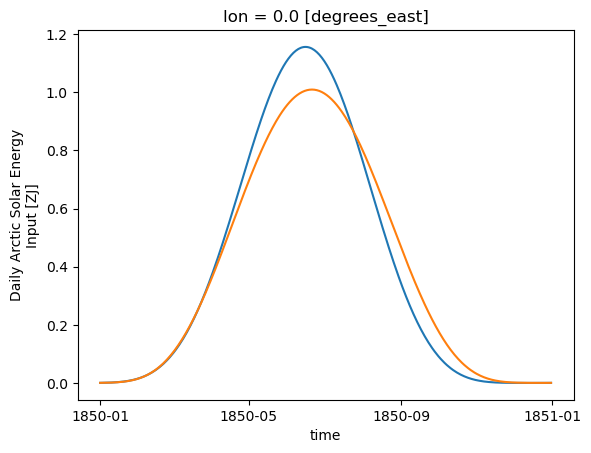

In [7]:
arc_energy_lig_all=latitude_band_areas*lig_rsdt[:,83:]*86400
arc_energy_lig_int=arc_energy_lig_all.sum(dim='lat')
arc_energy_lig_cum=arc_energy_lig_int.cumsum(dim='time')
arc_energy_lig_int=arc_energy_lig_int/1e21
arc_energy_lig_int.attrs['units'] = 'ZJ'
arc_energy_lig_int.attrs['long_name'] = 'Daily Solar Energy Input above 65oN' 
arc_energy_pi_all=latitude_band_areas*pi_rsdt[:,83:]*86400
arc_energy_pi_int=arc_energy_pi_all.sum(dim='lat')
arc_energy_pi_cum=arc_energy_pi_int.cumsum(dim='time')
arc_energy_pi_int=arc_energy_pi_int/1e21
arc_energy_pi_int.attrs['units'] = 'ZJ'
arc_energy_pi_int.attrs['long_name'] = 'Daily Arctic Solar Energy Input' 
arc_energy_lig_int.plot()
arc_energy_pi_int.plot()


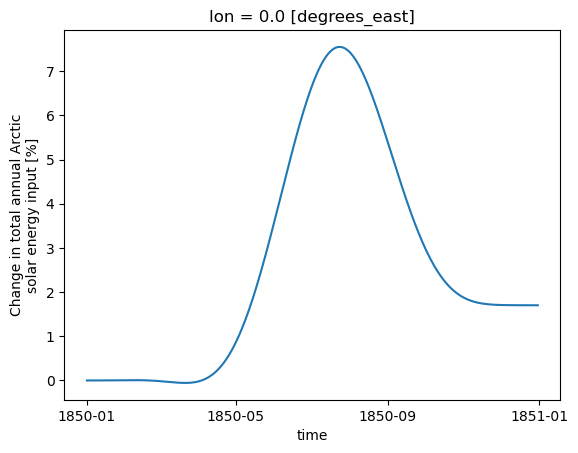

In [8]:
arc_energy_diff=arc_energy_lig_cum-arc_energy_pi_cum
arc_energy_diff=arc_energy_diff/arc_energy_pi_cum.values[364]*100
arc_energy_diff.attrs['units'] = '%'
arc_energy_diff.attrs['long_name'] = 'Change in total annual Arctic solar energy input'
arc_energy_diff.plot()